In [1]:
import math as m
import numpy as np
import pylab as py
import random as rd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
def desplazar_en_horizontal(x):
    delta_x = rd.randint(0,1)
    if (delta_x == 0):
        delta_x = -1
    if ((x + delta_x < 101) and (x + delta_x > 0)):
        x = x + delta_x
    return x

In [3]:
def desplazar_en_vertical(y):
    delta_y = rd.randint(0,1)
    if (delta_y == 0):
        delta_y = -1
    if ((y + delta_y < 101) and (y + delta_y > 0)):
        y = y + delta_y
    return y

In [4]:
def desplazar_estrategia_1(poblacion, tamanio):
    for i in range(tamanio):
            poblacion[i][1] = desplazar_en_horizontal(poblacion[i][1])
            poblacion[i][2] = desplazar_en_vertical(poblacion[i][2])
    enfermarPoblacion_estrategia_1_3(poblacion, tamanio)

In [5]:
def desplazar_estrategia_2(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][4] == 1):
            poblacion[i][1] = desplazar_en_horizontal(poblacion[i][1])
            poblacion[i][2] = desplazar_en_vertical(poblacion[i][2])
            if (poblacion[i][0] == 1):
                poblacion[i][3] = poblacion[i][3] - 1
                if (poblacion[i][3] == 0):
                    poblacion[i][4] = 0
    enfermarPoblacion_estrategia_2(poblacion, tamanio)

In [40]:
def desplazar_estrategia_3(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][3] == 1):
            poblacion[i][1] = desplazar_en_horizontal(poblacion[i][1])
            poblacion[i][2] = desplazar_en_vertical(poblacion[i][2])
    enfermarPoblacion_estrategia_1_3(poblacion, tamanio)

In [7]:
def cumplenDistancia(ciudadano_1, ciudadano_2):
    distancia_1 = (ciudadano_1[1] - ciudadano_2[1])**2
    distancia_2 = (ciudadano_1[2] - ciudadano_2[2])**2
    if (m.sqrt(distancia_1 + distancia_2) < 2):
        return False
    else:
        return True

In [8]:
def enfermar(ciudadano):
    if rd.random() > 0.4:
        ciudadano[0] = 1
    return ciudadano

In [9]:
def inicializarCuentaRegresiva(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][0] == 0):
            poblacion[i][3] = np.nan
        else:
            poblacion[i][3] = np.random.randint(10,20,1)

In [10]:
def setearCuentaRegresiva(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][0] == 0):
            poblacion[i][3] = np.nan
        if (poblacion[i][0] == 1):
            if (m.isnan(poblacion[i][3]) == True):
                poblacion[i][3] = np.random.randint(10,20,1)

In [11]:
def enfermarPoblacion_estrategia_1_3(poblacion, tamanio):
    for j in range(tamanio):
        for i in range(tamanio):
            if (cumplenDistancia(poblacion[j], poblacion[i]) == False and (j != i)):
                if (poblacion[j][0] != poblacion[i][0]):
                    if (poblacion[j][0] == 1):
                        poblacion[i] = enfermar(poblacion[i])
                    elif (poblacion[i][0] == 1):
                        poblacion[j] = enfermar(poblacion[j])

In [12]:
def enfermarPoblacion_estrategia_2(poblacion, tamanio):
    for j in range(tamanio):
        for i in range(tamanio):
            if (cumplenDistancia(poblacion[j], poblacion[i]) == False and (j != i)):
                if (poblacion[j][0] != poblacion[i][0]):
                    if (poblacion[j][0] == 1):
                        poblacion[i] = enfermar(poblacion[i])
                    elif (poblacion[i][0] == 1):
                        poblacion[j] = enfermar(poblacion[j])
    setearCuentaRegresiva(poblacion, tamanio)

In [13]:
def inicializarEnfermos_estrategia_1_3(poblacion, tamanio):
    random_list = []
    array_len = len(poblacion)

    while len(random_list) < (95):
        random_int = rd.randint(0,array_len-1)
        if random_int not in random_list:
            random_list.insert(len(random_list), random_int)

    for position in random_list:
        poblacion[position][0] = 0
    return poblacion

In [14]:
def inicializarEnfermos_estrategia_2(poblacion, tamanio):
    random_list = []
    array_len = len(poblacion)

    while len(random_list) < (95):
        random_int = rd.randint(0,array_len-1)
        if random_int not in random_list:
            random_list.insert(len(random_list), random_int)

    for position in random_list:
        poblacion[position][0] = 0
        
    inicializarCuentaRegresiva(poblacion, 100)
        
    return poblacion

In [15]:
def inicializarCaminantes_estrategia_2(poblacion, tamanio):
    random_list = []
    array_len = len(poblacion)

    while len(random_list) < (50):
        random_int = rd.randint(0,array_len-1)
        if random_int not in random_list:
            random_list.insert(len(random_list), random_int)

    for position in random_list:
        poblacion[position][4] = 0
                
    return poblacion

In [253]:
def inicializarCaminantes_estrategia_3(poblacion, tamanio):
    random_list = []
    array_len = len(poblacion)

    while len(random_list) < (50):
        random_int = rd.randint(0,array_len-1)
        if random_int not in random_list:
            random_list.insert(len(random_list), random_int)

    for position in random_list:
        poblacion[position][4] = 0
                
    return poblacion

In [17]:
def cantidadDeEnfermos(poblacion, tamanio):
    cantidad = 0
    for i in range(tamanio):
        if (poblacion[i][0] == 1):
            cantidad = cantidad + 1
    return cantidad

In [18]:
def cantidadDeSanos(poblacion, tamanio):
    cantidad = 0
    for i in range(tamanio):
        if (poblacion[i][0] == 0):
            cantidad = cantidad + 1
    return cantidad

## 10.a) Las personas enfermas no se curan nunca

Estrategia 1: las personas se mueven sin restricciones

In [19]:
(enfermo, coor_h, coor_v) = (np.ones(100),
                           np.random.uniform(0, 100, 100),
                           np.random.uniform(0, 100, 100))
poblacion_a1 = np.asarray((enfermo, coor_h, coor_v)).T
poblacion_a1 = inicializarEnfermos_estrategia_1_3(poblacion_a1, 100)

In [20]:
(instante_a1,enfermos_a1,sanos_a1) = ([],[],[])
for i in range(4000):
    desplazar_estrategia_1(poblacion_a1, 100)
    instante_a1.insert(i, i)
    enfermos_a1.insert(i, cantidadDeEnfermos(poblacion_a1, 100))
    sanos_a1.insert(i, cantidadDeSanos(poblacion_a1, 100))

/home/federico/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


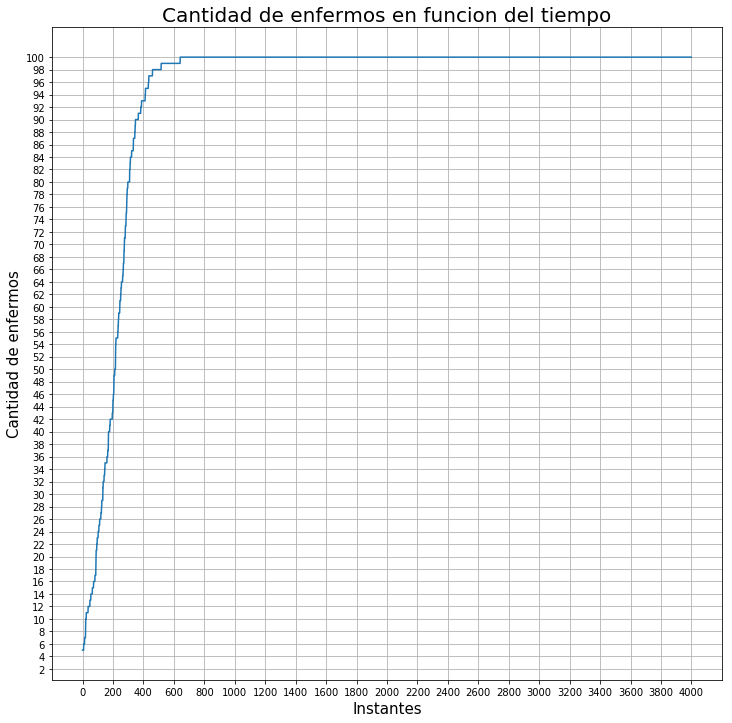

In [21]:
plt.figure(figsize=(12,12))
plt.xticks(np.arange(0, 4200, step = 200))
plt.yticks(np.arange(0, 102, step = 2))
plt.subplot().grid()
plt.title('Cantidad de enfermos en funcion del tiempo', fontsize = 20)
plt.xlabel('Instantes', fontsize = 15)
plt.ylabel('Cantidad de enfermos', fontsize = 15)
plt.plot(instante_a1, enfermos_a1)

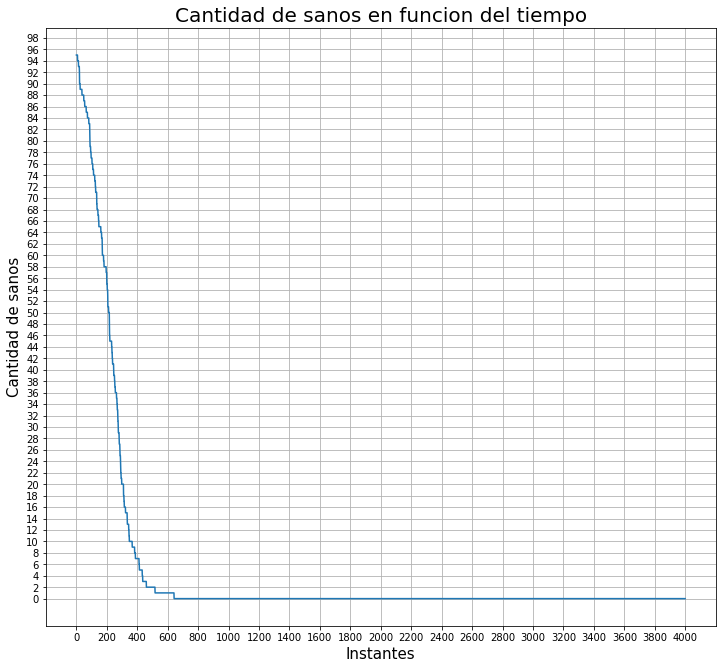

In [22]:
plt.figure(figsize=(12,11))
plt.xticks(np.arange(0, 4200, step = 200))
plt.yticks(np.arange(0, 102, step = 2))
plt.subplot().grid()
plt.title('Cantidad de sanos en funcion del tiempo', fontsize = 20)
plt.xlabel('Instantes', fontsize = 15)
plt.ylabel('Cantidad de sanos', fontsize = 15)
plt.plot(instante_a1, sanos_a1)

Estrategia 2: una vez un ciudadano se enferma, tiene de 10 a 20 turnos hasta que deja de poder caminar

In [23]:
(enfermo, coor_h, coor_v, time_remaining, se_mueve) = (np.ones(100),
                           np.random.uniform(0, 100, 100),
                           np.random.uniform(0, 100, 100),
                           np.zeros(100),
                           np.ones(100))
poblacion_2 = np.asarray((enfermo, coor_h, coor_v, time_remaining, se_mueve)).T
poblacion_2 = inicializarEnfermos_estrategia_2(poblacion_2, 100)

In [24]:
(instante_a2, enfermos_a2, sanos_a2) = ([],[],[])
for i in range(4000):
    desplazar_estrategia_2(poblacion_2, 100)
    instante_a2.insert(i, i)
    enfermos_a2.insert(i, cantidadDeEnfermos(poblacion_2, 100))
    sanos_a2.insert(i, cantidadDeSanos(poblacion_2, 100))

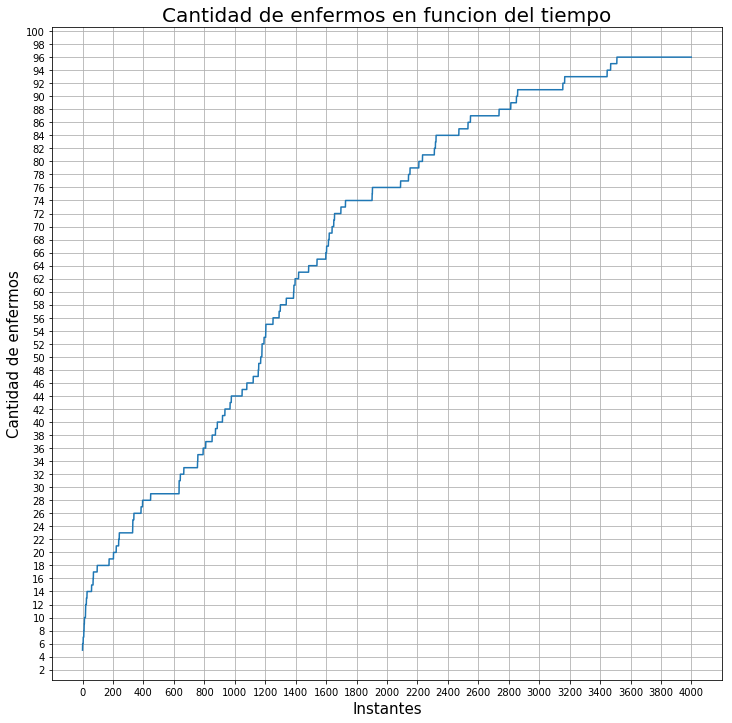

In [25]:
plt.figure(figsize=(12,12))
plt.xticks(np.arange(0, 4200, step = 200))
plt.yticks(np.arange(0, 102, step = 2))
plt.subplot().grid()
plt.title('Cantidad de enfermos en funcion del tiempo', fontsize = 20)
plt.xlabel('Instantes', fontsize = 15)
plt.ylabel('Cantidad de enfermos', fontsize = 15)
plt.plot(instante_a2, enfermos_a2)

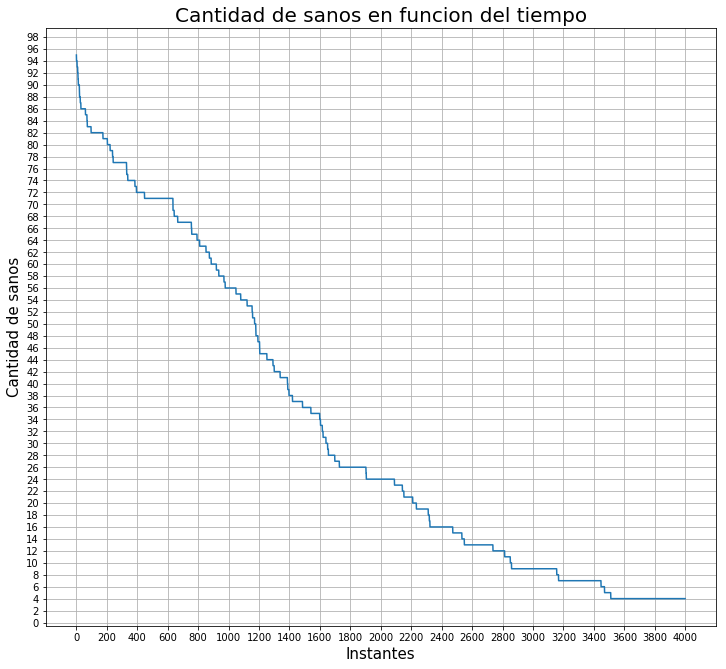

In [26]:
plt.figure(figsize=(12,11))
plt.xticks(np.arange(0, 4200, step = 200))
plt.yticks(np.arange(0, 100, step = 2))
plt.subplot().grid()
plt.title('Cantidad de sanos en funcion del tiempo', fontsize = 20)
plt.xlabel('Instantes', fontsize = 15)
plt.ylabel('Cantidad de sanos', fontsize = 15)
plt.plot(instante_a2, sanos_a2)

Estrategia 3: sólo la mitad de los ciudadanos pueden moverse

In [31]:
(enfermo, coor_h, coor_v, se_mueve) = (np.ones(100),
                           np.random.uniform(0, 100, 100),
                           np.random.uniform(0, 100, 100),
                           np.ones(100))
poblacion_3 = np.asarray((enfermo, coor_h, coor_v, se_mueve)).T
poblacion_3 = inicializarEnfermos_estrategia_1_3(poblacion_3, 100)
poblacion_3 = inicializarCaminantes_estrategia_3(poblacion_3, 100)

In [41]:
(instante_a3, enfermos_a3, sanos_a3) = ([],[],[])
for i in range(4000):
    desplazar_estrategia_3(poblacion_3, 100)
    instante_a3.insert(i, i)
    enfermos_a3.insert(i, cantidadDeEnfermos(poblacion_3, 100))
    sanos_a3.insert(i, cantidadDeSanos(poblacion_3, 100))

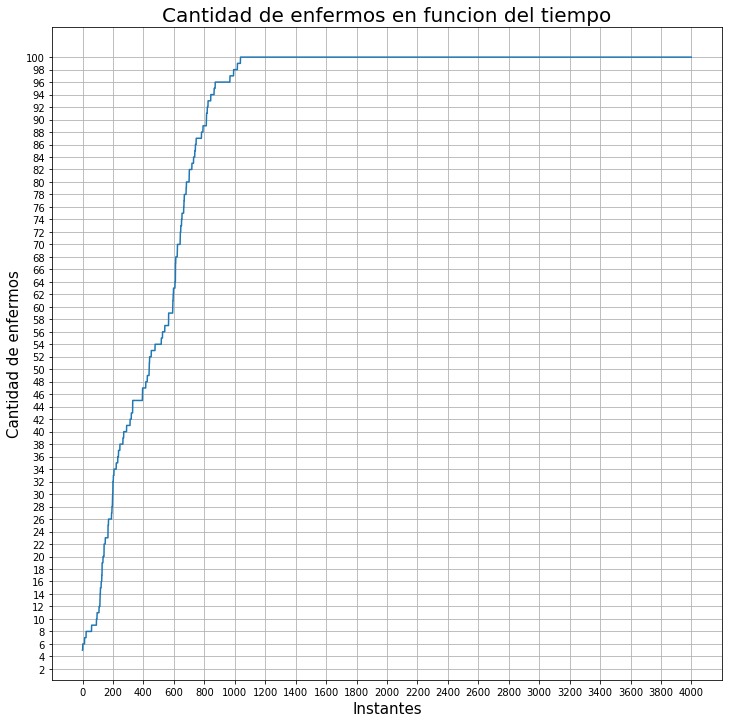

In [42]:
plt.figure(figsize=(12,12))
plt.xticks(np.arange(0, 4200, step = 200))
plt.yticks(np.arange(0, 102, step = 2))
plt.subplot().grid()
plt.title('Cantidad de enfermos en funcion del tiempo', fontsize = 20)
plt.xlabel('Instantes', fontsize = 15)
plt.ylabel('Cantidad de enfermos', fontsize = 15)
plt.plot(instante_a3, enfermos_a3)

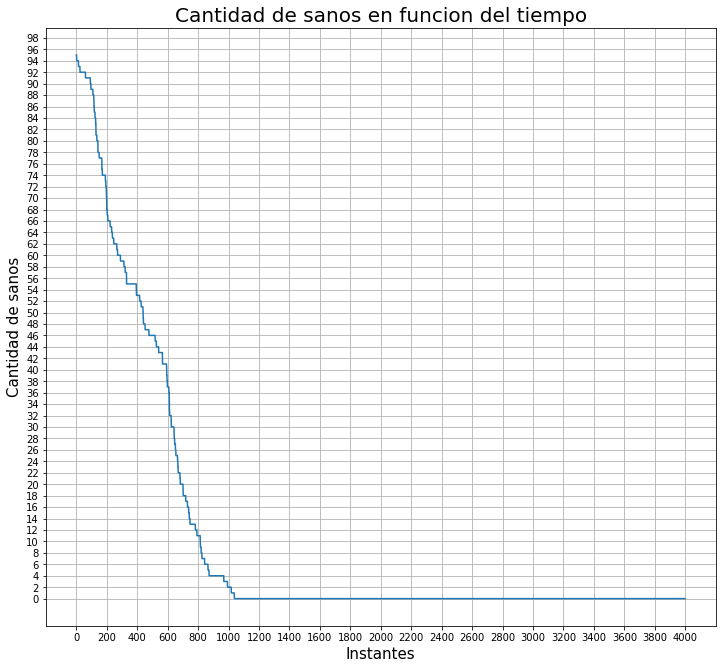

In [43]:
plt.figure(figsize=(12,11))
plt.xticks(np.arange(0, 4200, step = 200))
plt.yticks(np.arange(0, 100, step = 2))
plt.subplot().grid()
plt.title('Cantidad de sanos en funcion del tiempo', fontsize = 20)
plt.xlabel('Instantes', fontsize = 15)
plt.ylabel('Cantidad de sanos', fontsize = 15)
plt.plot(instante_a3, sanos_a3)

## 10.b) Cuando una persona se enferma, luego de 20 instantes tiene un 80% de probabilidad de curarse

- Se entiende que cuando una persona se cura es capaz de moverse.
- Si no consigue curarse, no vuelve a tener la oportunidad de hacerlo, ya que la función curar() se invoca luego de restarle 1 en cantidad de instantes que debe esperar hasta curarse, y esto sólo se hace cuando esa cantidad de instantes es mayor a cero.

In [419]:
def inicializarTiempoHastaCurarse(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][0] == 0):
            poblacion[i][3] = 0
        else:
            poblacion[i][3] = 20
    return poblacion

In [420]:
def curar_1_3(ciudadano):
    if rd.random() > 0.2:
        ciudadano[0] = 0
        ciudadano[3] = np.nan
    return ciudadano

In [421]:
def curar_2(ciudadano):
    if rd.random() > 0.2:
        ciudadano[0] = 0
        ciudadano[3] = np.nan
        ciudadano[5] = np.nan
    return ciudadano

In [422]:
def enfermar_b(ciudadano):
    if rd.random() > 0.4:
        ciudadano[0] = 1
        ciudadano[3] = 20
    return ciudadano

In [423]:
def inicializarEnfermos_b_estrategia_1_3(poblacion, tamanio):
    random_list = []
    array_len = len(poblacion)

    while len(random_list) < (95):
        random_int = rd.randint(0,array_len-1)
        if random_int not in random_list:
            random_list.insert(len(random_list), random_int)

    for position in random_list:
        poblacion[position][0] = 0
    return poblacion

In [424]:
def enfermarPoblacion_b_estrategia_1_3(poblacion, tamanio):
    for j in range(tamanio):
        for i in range(tamanio):
            if (cumplenDistancia(poblacion[j], poblacion[i]) == False and (j != i)):
                if (poblacion[j][0] != poblacion[i][0]):
                    if (poblacion[j][0] == 1):
                        poblacion[i] = enfermar_b(poblacion[i])
                    elif (poblacion[i][0] == 1):
                        poblacion[j] = enfermar_b(poblacion[j])

In [425]:
def desplazar_b_estrategia_1(poblacion, tamanio):
    for i in range(tamanio):
            poblacion[i][1] = desplazar_en_horizontal(poblacion[i][1])
            poblacion[i][2] = desplazar_en_vertical(poblacion[i][2])
            if (poblacion[i][0] == 1 and poblacion[i][3] > 0):
                poblacion[i][3] = poblacion[i][3] - 1
                if (poblacion[i][3] == 0):
                    poblacion[i] = curar_1_3(poblacion[i])
    enfermarPoblacion_b_estrategia_1_3(poblacion, tamanio)

In [426]:
def setearCuentaRegresiva_b(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][0] == 0):
            poblacion[i][5] = np.nan
        if (poblacion[i][0] == 1):
            if (m.isnan(poblacion[i][5]) == True):
                poblacion[i][5] = np.random.randint(10,20,1)

In [427]:
def inicializarCuentaRegresiva_b(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][0] == 0):
            poblacion[i][5] = np.nan
        else:
            poblacion[i][5] = np.random.randint(10,20,1)

In [428]:
def inicializarEnfermos_b_estrategia_2(poblacion, tamanio):
    random_list = []
    array_len = len(poblacion)

    while len(random_list) < (95):
        random_int = rd.randint(0,array_len-1)
        if random_int not in random_list:
            random_list.insert(len(random_list), random_int)

    for position in random_list:
        poblacion[position][0] = 0
    inicializarCuentaRegresiva_b(poblacion, tamanio)
    return poblacion

In [429]:
def enfermarPoblacion_b_estrategia_2(poblacion, tamanio):
    for j in range(tamanio):
        for i in range(tamanio):
            if (cumplenDistancia(poblacion[j], poblacion[i]) == False and (j != i)):
                if (poblacion[j][0] != poblacion[i][0]):
                    if (poblacion[j][0] == 1):
                        poblacion[i] = enfermar_b(poblacion[i])
                    elif (poblacion[i][0] == 1):
                        poblacion[j] = enfermar_b(poblacion[j])
    setearCuentaRegresiva_b(poblacion, tamanio)

In [430]:
def desplazar_b_estrategia_2(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][4] == 1):
            poblacion[i][1] = desplazar_en_horizontal(poblacion[i][1])
            poblacion[i][2] = desplazar_en_vertical(poblacion[i][2])
            if (poblacion[i][0] == 1):
                if (poblacion[i][5] > 0):
                    poblacion[i][5] = poblacion[i][5] - 1
                    if (poblacion[i][5] == 0):
                        poblacion[i][4] = 0
        if (poblacion[i][0] == 1 and poblacion[i][3] > 0):
            poblacion[i][3] = poblacion[i][3] - 1
            if (poblacion[i][3] == 0):
                poblacion[i] = curar_2(poblacion[i])
    enfermarPoblacion_b_estrategia_2(poblacion, tamanio)

In [431]:
def inicializarCaminantes_b_estrategia_3(poblacion, tamanio):
    random_list = []
    array_len = len(poblacion)

    while len(random_list) < (50):
        random_int = rd.randint(0,array_len-1)
        if random_int not in random_list:
            random_list.insert(len(random_list), random_int)

    for position in random_list:
        poblacion[position][4] = 0
                
    return poblacion

In [444]:
def desplazar_b_estrategia_3(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][4] == 1):
            poblacion[i][1] = desplazar_en_horizontal(poblacion[i][1])
            poblacion[i][2] = desplazar_en_vertical(poblacion[i][2])
        if (poblacion[i][0] == 1 and poblacion[i][3] > 0):
            poblacion[i][3] = poblacion[i][3] - 1
            if (poblacion[i][3] == 0):
                poblacion[i] = curar_b(poblacion[i])
    enfermarPoblacion_b(poblacion, tamanio)

In [445]:
def actualizarTiempoHastaCurarse(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][0] == 1 and poblacion[i][5] > 0):
            poblacion[i][5] = poblacion[i][5] - 1
            if (poblacion[i][5] == 0):
                poblacion[i] = curar(poblacion[i])
    return poblacion

Estrategia 1

In [446]:
(enfermo, coor_h, coor_v, tiempo_hasta_curarse) = (np.ones(100),
                         np.random.uniform(0, 100, 100),
                         np.random.uniform(0, 100, 100),
                         np.ones(100))
poblacion_b_1 = np.asarray((enfermo, coor_h, coor_v, tiempo_hasta_curarse)).T
poblacion_b_1 = inicializarEnfermos_b_estrategia_1_3(poblacion_b_1, 100)
poblacion_b_1 = inicializarTiempoHastaCurarse(poblacion_b_1, 100)

In [447]:
(instante_b1, enfermos_b1, sanos_b1) = ([],[],[])
for i in range(4000):
    desplazar_b_estrategia_1(poblacion_b_1, 100)
    instante_b1.insert(i, i)
    enfermos_b1.insert(i, cantidadDeEnfermos(poblacion_b_1, 100))
    sanos_b1.insert(i, cantidadDeSanos(poblacion_b_1, 100))

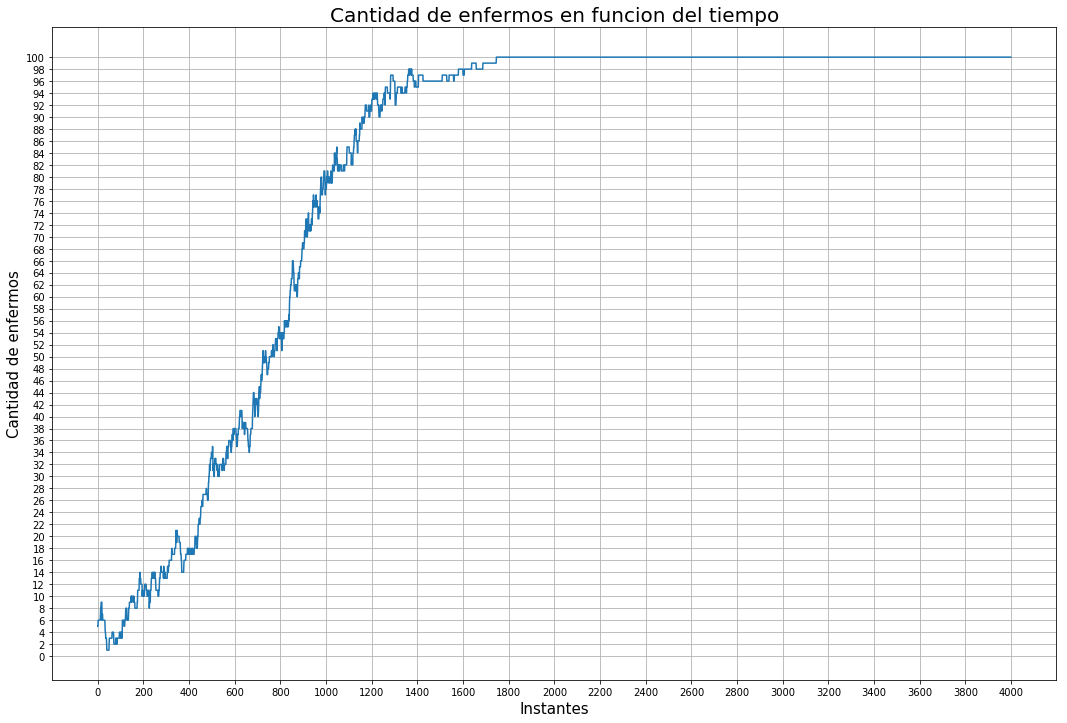

In [448]:
plt.figure(figsize=(18,12))
plt.xticks(np.arange(0, 4200, step = 200))
plt.yticks(np.arange(0, 102, step = 2))
plt.subplot().grid()
plt.title('Cantidad de enfermos en funcion del tiempo', fontsize = 20)
plt.xlabel('Instantes', fontsize = 15)
plt.ylabel('Cantidad de enfermos', fontsize = 15)
plt.plot(instante_b1, enfermos_b1)

Estrategia 2

In [456]:
(enfermo, coor_h, coor_v, tiempo_hasta_curarse, se_mueve, time_remaining) = (np.ones(100),
                         np.random.uniform(0, 100, 100),
                         np.random.uniform(0, 100, 100),
                         np.zeros(100),
                         np.ones(100),
                         np.ones(100))
poblacion_b_2 = np.asarray((enfermo, coor_h, coor_v, tiempo_hasta_curarse, se_mueve, time_remaining)).T
poblacion_b_2 = inicializarEnfermos_b_estrategia_2(poblacion_b_2, 100)
poblacion_b_2 = inicializarTiempoHastaCurarse(poblacion_b_2, 100)

In [457]:
(instante_b2, enfermos_b2, sanos_b2) = ([],[],[])
for i in range(4000):
    desplazar_b_estrategia_2(poblacion_b_2, 100)
    instante_b2.insert(i, i)
    enfermos_b2.insert(i, cantidadDeEnfermos(poblacion_b_2, 100))
    sanos_b2.insert(i, cantidadDeSanos(poblacion_b_2, 100))

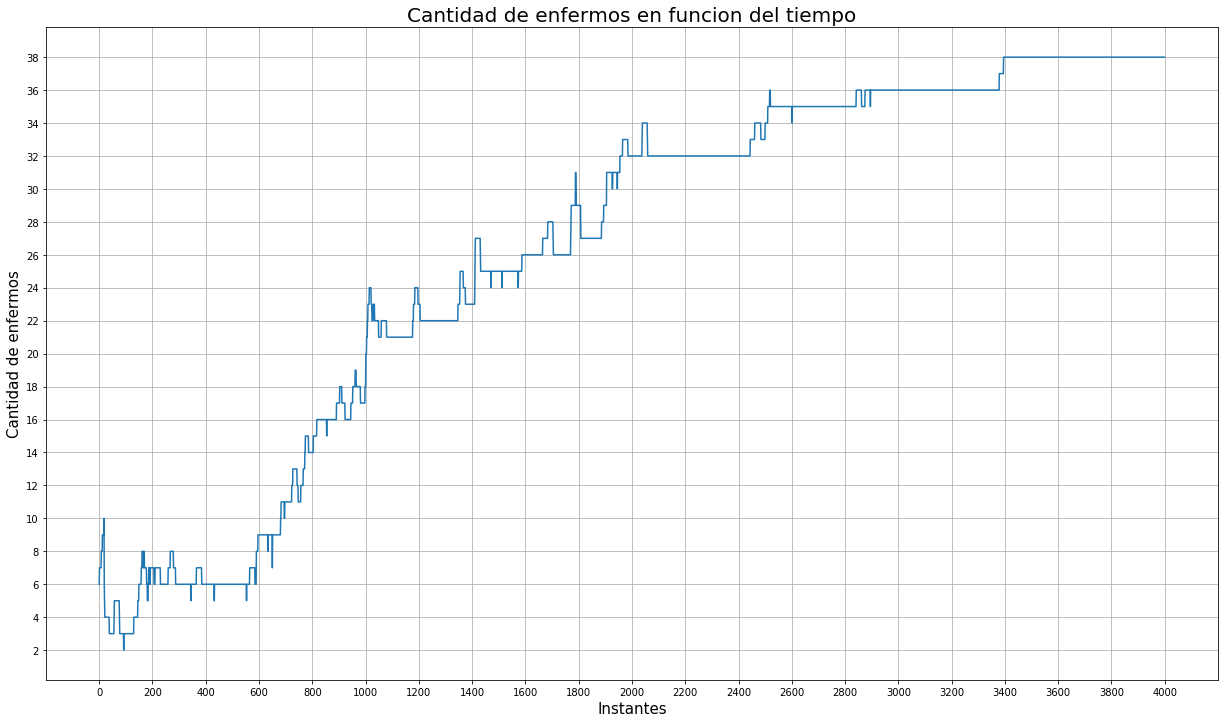

In [458]:
plt.figure(figsize=(21,12))
plt.xticks(np.arange(0, 4200, step = 200))
plt.yticks(np.arange(0, 102, step = 2))
plt.subplot().grid()
plt.title('Cantidad de enfermos en funcion del tiempo', fontsize = 20)
plt.xlabel('Instantes', fontsize = 15)
plt.ylabel('Cantidad de enfermos', fontsize = 15)
plt.plot(instante_b2, enfermos_b2)

Estrategia 3

In [453]:
(enfermo, coor_h, coor_v, tiempo_hasta_curarse, se_mueve) = (np.ones(100),
                         np.random.uniform(0, 100, 100),
                         np.random.uniform(0, 100, 100),
                         np.zeros(100),
                         np.ones(100))
poblacion_b_3 = np.asarray((enfermo, coor_h, coor_v, tiempo_hasta_curarse, se_mueve)).T
poblacion_b_3 = inicializarEnfermos_b_estrategia_1_3(poblacion_b_3, 100)
poblacion_b_3 = inicializarTiempoHastaCurarse(poblacion_b_3, 100)
poblacion_b_3 = inicializarCaminantes_b_estrategia_3(poblacion_b_3, 100)

In [454]:
(instante_b3, enfermos_b3, sanos_b3) = ([],[],[])
for i in range(4000):
    desplazar_b_estrategia_1(poblacion_b_3, 100)
    instante_b3.insert(i, i)
    enfermos_b3.insert(i, cantidadDeEnfermos(poblacion_b_3, 100))
    sanos_b3.insert(i, cantidadDeSanos(poblacion_b_3, 100))

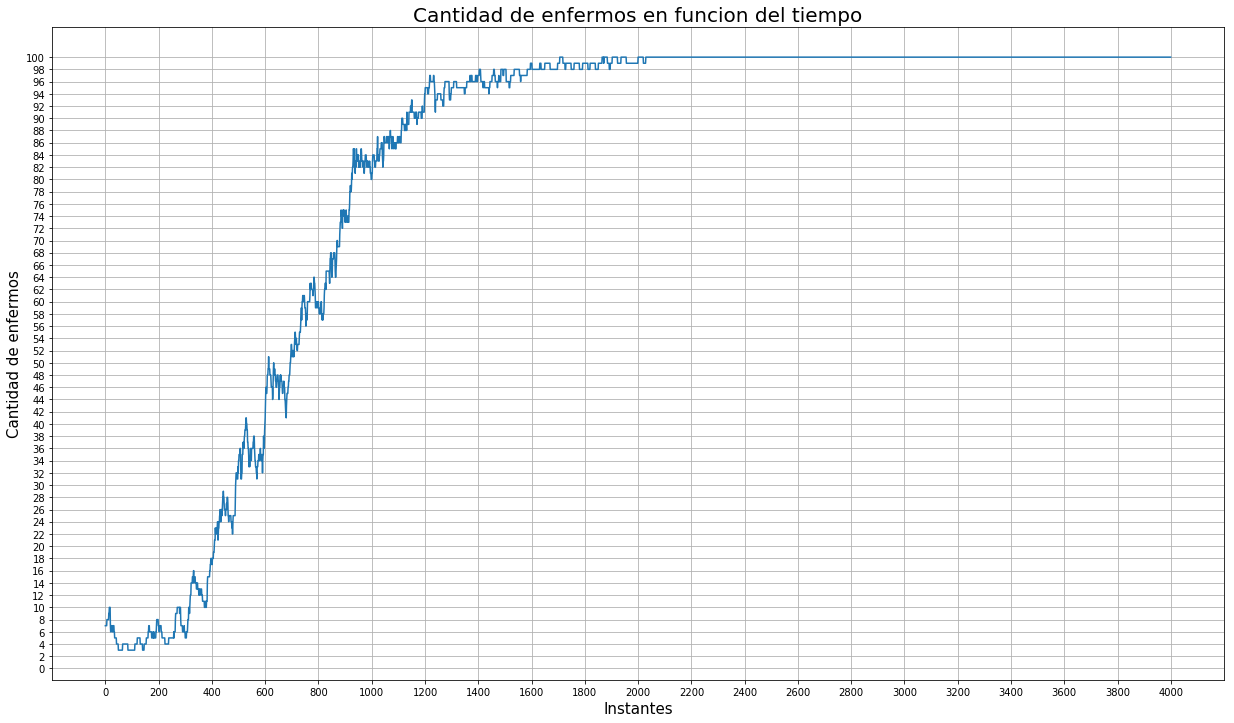

In [455]:
plt.figure(figsize=(21,12))
plt.xticks(np.arange(0, 4200, step = 200))
plt.yticks(np.arange(0, 102, step = 2))
plt.subplot().grid()
plt.title('Cantidad de enfermos en funcion del tiempo', fontsize = 20)
plt.xlabel('Instantes', fontsize = 15)
plt.ylabel('Cantidad de enfermos', fontsize = 15)
plt.plot(instante_b3, enfermos_b3)